In [366]:
import pandas as pd
df=pd.read_csv("data-2.csv")

In [367]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [369]:
df.columns.values

array(['Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Op

In [370]:
cb=df.loc[:,df.nunique().values==1]

In [371]:
import numpy as np

In [372]:
cb.std()

 Net Income Flag    0.0
dtype: float64

In [373]:
df.loc[:,df.nunique().values==2]

,Bankrupt?,Liability-Assets Flag
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6814,0,0
6815,0,0
6816,0,0
6817,0,0


In [374]:
import pandas as pd
import numpy as np

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df = df.drop(columns=to_drop)

In [375]:
to_drop

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Current Liability to Assets',
 ' Operating Funds to Liability',
 ' Current Liabilities/Equity',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Equity to Long-term Liability',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

In [376]:
df.shape

(6819, 71)

In [377]:
X=df.drop('Bankrupt?', axis=1)

In [378]:
y=df['Bankrupt?']

In [379]:
X.shape

(6819, 70)

In [380]:
y.shape

(6819,)

In [381]:
X.head()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490


In [382]:
X=X.drop(' Net Income Flag', axis=1)

A "liability-assets flag" is a binary variable used in financial data analysis to signal if a company's total liabilities exceed its total assets. This flags a potentially high-risk financial situation for the company, and it is most often used in predictive models, such as those that assess the probability of bankruptcy. 

In [383]:
cat_vars=[" Liability-Assets Flag"]

In [384]:
num_vars = [
    ' ROA(C) before interest and depreciation before interest',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' Operating Gross Margin',
    ' Realized Sales Gross Margin',
    ' Operating Profit Rate',
    ' Pre-tax net Interest Rate',
    ' After-tax net Interest Rate',
    ' Non-industry income and expenditure/revenue',
    ' Continuous interest rate (after tax)',
    ' Operating Expense Rate',
    ' Research and development expense rate',
    ' Cash flow rate',
    ' Interest-bearing debt interest rate',
    ' Tax rate (A)',
    ' Net Value Per Share (B)',
    ' Net Value Per Share (A)',
    ' Net Value Per Share (C)',
    ' Persistent EPS in the Last Four Seasons',
    ' Cash Flow Per Share',
    ' Revenue Per Share (Yuan ¥)',
    ' Operating Profit Per Share (Yuan ¥)',
    ' Per Share Net profit before tax (Yuan ¥)',
    ' Realized Sales Gross Profit Growth Rate',
    ' Operating Profit Growth Rate',
    ' After-tax Net Profit Growth Rate',
    ' Regular Net Profit Growth Rate',
    ' Continuous Net Profit Growth Rate',
    ' Total Asset Growth Rate',
    ' Net Value Growth Rate',
    ' Total Asset Return Growth Rate Ratio',
    ' Cash Reinvestment %',
    ' Current Ratio',
    ' Quick Ratio',
    ' Interest Expense Ratio',
    ' Total debt/Total net worth',
    ' Debt ratio %',
    ' Net worth/Assets',
    ' Long-term fund suitability ratio (A)',
    ' Borrowing dependency',
    ' Contingent liabilities/Net worth',
    ' Operating profit/Paid-in capital',
    ' Net profit before tax/Paid-in capital',
    ' Inventory and accounts receivable/Net value',
    ' Total Asset Turnover',
    ' Accounts Receivable Turnover',
    ' Average Collection Days',
    ' Inventory Turnover Rate (times)',
    ' Fixed Assets Turnover Frequency',
    ' Net Worth Turnover Rate (times)',
    ' Revenue per person',
    ' Operating profit per person',
    ' Allocation rate per person',
    ' Working Capital to Total Assets',
    ' Quick Assets/Total Assets',
    ' Current Assets/Total Assets',
    ' Cash/Total Assets',
    ' Quick Assets/Current Liability',
    ' Cash/Current Liability',
    ' Current Liability to Assets',
    ' Operating Funds to Liability',
    ' Inventory/Working Capital',
    ' Inventory/Current Liability',
    ' Current Liabilities/Liability',
    ' Working Capital/Equity',
    ' Current Liabilities/Equity',
    ' Long-term Liability to Current Assets',
    ' Retained Earnings to Total Assets',
    ' Total income/Total expense',
    ' Total expense/Assets',
    ' Current Asset Turnover Rate',
    ' Quick Asset Turnover Rate',
    ' Working capitcal Turnover Rate',
    ' Cash Turnover Rate',
    ' Cash Flow to Sales',
    ' Fixed Assets to Assets',
    ' Current Liability to Liability',
    ' Current Liability to Equity',
    ' Equity to Long-term Liability',
    ' Cash Flow to Total Assets',
    ' Cash Flow to Liability',
    ' CFO to Assets',
    ' Cash Flow to Equity',
    ' Current Liability to Current Assets',
    ' Net Income to Total Assets',
    ' Total assets to GNP price',
    ' No-credit Interval',
    ' Gross Profit to Sales',
    " Net Income to Stockholder's Equity",
    ' Liability to Equity',
    ' Degree of Financial Leverage (DFL)',
    ' Interest Coverage Ratio (Interest expense to EBIT)',
    ' Equity to Liability'
]


In [385]:
list1 = num_vars
list2 = to_drop

# Convert the second list to a set for efficient lookups
set2 = set(list2)

# Use a list comprehension to filter elements from list1
num_vars = [item for item in list1 if item not in set2]

print(num_vars)


[' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts

In [386]:
from sklearn.model_selection import train_test_split


In [387]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
# scale the numerical col
from sklearn.preprocessing import StandardScaler

# scaling
# X_train, n_names, c_names
n_names=num_vars
c_names=cat_vars

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[n_names])
X_test_scaled = scaler.transform(X_test[n_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=n_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=n_names, index=X_test.index)

X_train_scaled = pd.concat([X_train_scaled, X_train[c_names]], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[c_names]], axis=1)

In [460]:
#X_train_scaled.to_csv('X_train_scaled.csv', index=False)

In [389]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_scaled_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [390]:
y_train_res.value_counts()

Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

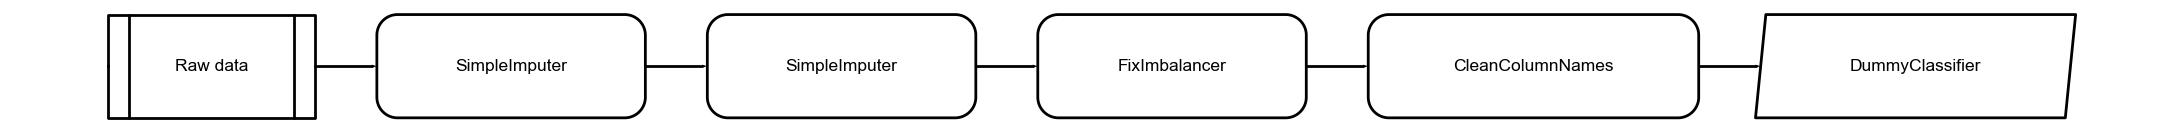

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

                                    Model  Accuracy     AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.9677  0.5000  0.0000  0.0000   
et                 Extra Trees Classifier    0.9625  0.9357  0.5142  0.4520   
xgboost         Extreme Gradient Boosting    0.9600  0.9280  0.4358  0.4051   
lightgbm  Light Gradient Boosting Machine    0.9591  0.9280  0.4600  0.4003   
rf               Random Forest Classifier    0.9573  0.9327  0.4950  0.3839   
gbc          Gradient Boosting Classifier    0.9386  0.9237  0.6096  0.2899   
ada                  Ada Boost Classifier    0.9288  0.8974  0.6029  0.2527   
dt               Decision Tree Classifier    0.9277  0.6737  0.4021  0.1987   
lda          Linear Discriminant Analysis    0.8718  0.9088  0.8054  0.1779   
ridge                    Ridge Classifier    0.8634  0.9172  0.8504  0.1736   
knn                K Neighbors Classifier    0.8364  0.6253  0.3450  0.0720   
lr                    Logistic Regression    0.7616 

In [391]:
# Use for classification
from pycaret.classification import *

# Initialize setup
s = setup(data=df,
          target='Bankrupt?',
          session_id=42,
          fix_imbalance=True
)

# Compare all models
best_model = compare_models()

# Evaluate the best one
evaluate_model(best_model)

# Print classification report
print(pull())   # returns last displayed table as DataFrame

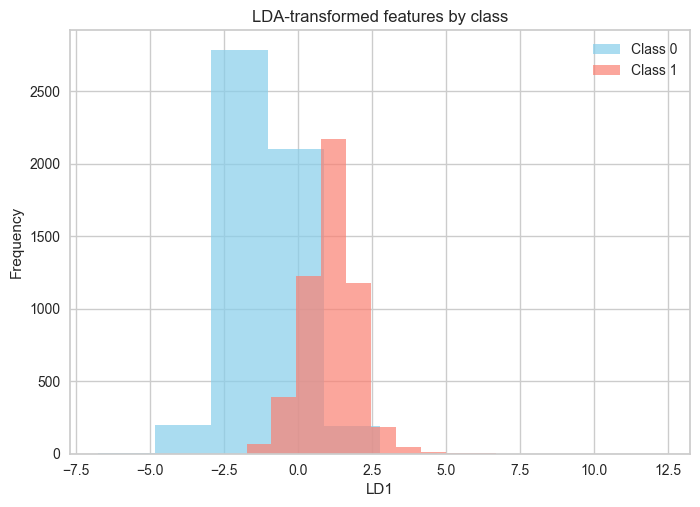

In [392]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda=LinearDiscriminantAnalysis()
lda.fit(X_train_scaled_res, y_train_res)

X_lda=lda.transform(X_train_scaled_res)

# Plot histograms for each class
plt.hist(X_lda[y_train_res == 0], label='Class 0', alpha=0.7, color='skyblue')
plt.hist(X_lda[y_train_res == 1], label='Class 1', alpha=0.7, color='salmon')

plt.xlabel('LD1') 
plt.ylabel('Frequency')
plt.title('LDA-transformed features by class')
plt.legend()
plt.show()

#---pred
pred_train_lda=lda.predict(X_train_scaled_res)

In [421]:
best_model =compare_models(n_select=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9677,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
et,Extra Trees Classifier,0.9625,0.9357,0.5142,0.4520,0.4760,0.4571,0.4606,0.2610
xgboost,Extreme Gradient Boosting,0.9600,0.9280,0.4358,0.4051,0.4157,0.3953,0.3977,0.3580
lightgbm,Light Gradient Boosting Machine,0.9591,0.9280,0.4600,0.4003,0.4216,0.4010,0.4053,0.6530
rf,Random Forest Classifier,0.9573,0.9327,0.4950,0.3839,0.4295,0.4079,0.4129,1.7030
gbc,Gradient Boosting Classifier,0.9386,0.9237,0.6096,0.2899,0.3919,0.3641,0.3926,5.5620
ada,Ada Boost Classifier,0.9288,0.8974,0.6029,0.2527,0.3546,0.3239,0.3592,1.0500
dt,Decision Tree Classifier,0.9277,0.6737,0.4021,0.1987,0.2646,0.2315,0.2481,0.4090
lda,Linear Discriminant Analysis,0.8718,0.9088,0.8054,0.1779,0.2909,0.2513,0.3400,0.0660
ridge,Ridge Classifier,0.8634,0.9172,0.8504,0.1736,0.2881,0.2477,0.3460,0.0340


In [422]:
top15_models=best_model
top15_models

[DummyClassifier(constant=None, random_state=42, strategy='prior'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interacti

In [395]:
train_preds

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,prediction_label,prediction_score
3295,0.531760,0.611576,0.999121,0.303400,1.358729e-04,0.000000e+00,0.465310,0.000646,0.064480,0.164342,...,0.049710,0,0.000557,0.624058,0.027301,0.566798,1,0.034138,0,0.9809
2232,0.468630,0.601010,0.999012,0.303474,7.530000e+09,0.000000e+00,0.465717,0.000558,0.000000,0.187856,...,0.037932,0,0.030763,0.619200,0.028223,0.568058,1,0.018026,0,0.7615
5538,0.507093,0.611972,0.999132,0.303451,1.320569e-04,4.640000e+09,0.472676,0.000178,0.192631,0.208714,...,0.016081,0,0.002987,0.625407,0.026885,0.565571,1,0.042552,0,0.9886
6282,0.483937,0.601183,0.999032,0.303413,5.860000e+08,6.790000e+08,0.471008,0.000427,0.924486,0.191016,...,0.043999,0,0.001312,0.622709,0.027413,0.567025,1,0.045048,0,0.9827
2143,0.481695,0.631942,0.999006,0.303662,5.637279e-04,1.685969e-04,0.448195,0.000000,0.000000,0.170663,...,0.004492,0,0.000280,0.624105,0.026791,0.565159,1,0.154753,0,0.9951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.602221,0.999046,0.303527,6.150000e+09,3.800000e+09,0.470314,0.000249,0.029760,0.237832,...,0.044215,0,0.318807,0.623799,0.026865,0.565486,1,0.024197,0,0.9864
1078,0.481597,0.605933,0.999021,0.303344,1.455864e-04,3.310000e+09,0.461711,0.000298,0.000000,0.176942,...,0.031261,0,0.001990,0.623473,0.025451,0.588994,1,0.023023,0,0.8822
6687,0.622288,0.614293,0.998882,0.306831,2.438774e-04,1.387146e-04,0.454466,0.000519,0.000000,0.290885,...,0.006380,0,0.002238,0.624557,0.026794,0.565172,1,0.143685,0,0.9820
2623,0.586847,0.609774,0.999064,0.303589,1.644351e-04,2.170000e+09,0.472127,0.000000,0.206094,0.188193,...,0.020439,0,0.000987,0.623850,0.026791,0.565159,1,0.051988,0,0.9937


In [396]:

train_preds = predict_model(best_model[1], data=get_config('X_train'))
train_actuals = get_config('y_train')

from sklearn.metrics import classification_report
print(classification_report(train_actuals, train_preds['prediction_label']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



In [424]:
from sklearn.metrics import classification_report

for model in top15_models:
    print(f"\n=== {model.__class__.__name__} ===")

    # Train
    train_preds = predict_model(model, data=get_config('X_train'))
    print("Train Report:")
    print(classification_report(get_config('y_train'), train_preds['prediction_label']))

    # Test
    test_preds = predict_model(model, data=get_config('X_test'))
    print("Test Report:")
    print(classification_report(get_config('y_test'), test_preds['prediction_label']))



=== DummyClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4619
           1       0.00      0.00      0.00       154

    accuracy                           0.97      4773
   macro avg       0.48      0.50      0.49      4773
weighted avg       0.94      0.97      0.95      4773



Test Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


=== ExtraTreesClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.45      0.53      0.49        66

    accuracy                           0.96      2046
   macro avg       0.72      0.75      0.73      2046
weighted avg       0.97      0.96      0.97      2046


=== XGBClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.48      0.42      0.45        66

    accuracy                           0.97      2046
   macro avg       0.73      0.70      0.72      2046
weighted avg       0.96      0.97      0.97      2046


=== LGBMClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.49      0.50      0.50        66

    accuracy                           0.97      2046
   macro avg       0.74      0.74      0.74      2046
weighted avg       0.97      0.97      0.97      2046


=== RandomForestClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.42      0.48      0.45        66

    accuracy                           0.96      2046
   macro avg       0.70      0.73      0.71      2046
weighted avg       0.96      0.96      0.96      2046


=== GradientBoostingClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4619
           1       0.50      0.92      0.65       154

    accuracy                           0.97      4773
   macro avg       0.75      0.95      0.81      4773
weighted avg       0.98      0.97      0.97      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1980
           1       0.26      0.55      0.35        66

    accuracy                           0.93      2046
   macro avg       0.62      0.75      0.66      2046
weighted avg       0.96      0.93      0.95      2046


=== AdaBoostClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4619
           1       0.35      0.74      0.47       154

    accuracy                           0.95      4773
   macro avg       0.67      0.85      0.72      4773
weighted avg       0.97      0.95      0.96      4773



Test Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1980
           1       0.26      0.59      0.36        66

    accuracy                           0.93      2046
   macro avg       0.62      0.77      0.66      2046
weighted avg       0.96      0.93      0.95      2046


=== DecisionTreeClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4619
           1       1.00      1.00      1.00       154

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1980
           1       0.27      0.48      0.34        66

    accuracy                           0.94      2046
   macro avg       0.62      0.72      0.66      2046
weighted avg       0.96      0.94      0.95      2046


=== LinearDiscriminantAnalysis ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4619
           1       0.19      0.90      0.32       154

    accuracy                           0.88      4773
   macro avg       0.59      0.89      0.62      4773
weighted avg       0.97      0.88      0.91      4773



Test Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1980
           1       0.17      0.74      0.28        66

    accuracy                           0.88      2046
   macro avg       0.58      0.81      0.61      2046
weighted avg       0.96      0.88      0.91      2046


=== RidgeClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      4619
           1       0.18      0.90      0.30       154

    accuracy                           0.87      4773
   macro avg       0.59      0.88      0.61      4773
weighted avg       0.97      0.87      0.91      4773



Test Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1980
           1       0.18      0.82      0.29        66

    accuracy                           0.87      2046
   macro avg       0.59      0.85      0.61      2046
weighted avg       0.97      0.87      0.91      2046


=== KNeighborsClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      4619
           1       0.24      1.00      0.39       154

    accuracy                           0.90      4773
   macro avg       0.62      0.95      0.67      4773
weighted avg       0.98      0.90      0.93      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1980
           1       0.09      0.36      0.14        66

    accuracy                           0.85      2046
   macro avg       0.53      0.62      0.53      2046
weighted avg       0.95      0.85      0.90      2046


=== LogisticRegression ===


Train Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      4619
           1       0.07      0.47      0.12       154

    accuracy                           0.77      4773
   macro avg       0.52      0.62      0.49      4773
weighted avg       0.95      0.77      0.84      4773



Test Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1980
           1       0.05      0.33      0.09        66

    accuracy                           0.77      2046
   macro avg       0.51      0.56      0.48      2046
weighted avg       0.94      0.77      0.85      2046


=== SGDClassifier ===


Train Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      4619
           1       0.04      0.38      0.07       154

    accuracy                           0.67      4773
   macro avg       0.50      0.53      0.44      4773
weighted avg       0.94      0.67      0.78      4773



Test Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1980
           1       0.04      0.35      0.07        66

    accuracy                           0.68      2046
   macro avg       0.50      0.52      0.44      2046
weighted avg       0.94      0.68      0.79      2046


=== QuadraticDiscriminantAnalysis ===


Train Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59      4619
           1       0.05      1.00      0.10       154

    accuracy                           0.44      4773
   macro avg       0.53      0.71      0.35      4773
weighted avg       0.97      0.44      0.58      4773



Test Report:
              precision    recall  f1-score   support

           0       0.98      0.43      0.60      1980
           1       0.04      0.80      0.08        66

    accuracy                           0.44      2046
   macro avg       0.51      0.62      0.34      2046
weighted avg       0.95      0.44      0.58      2046


=== GaussianNB ===


Train Report:
              precision    recall  f1-score   support

           0       0.99      0.04      0.08      4619
           1       0.03      0.99      0.06       154

    accuracy                           0.07      4773
   macro avg       0.51      0.51      0.07      4773
weighted avg       0.96      0.07      0.08      4773



Test Report:
              precision    recall  f1-score   support

           0       0.96      0.04      0.08      1980
           1       0.03      0.95      0.06        66

    accuracy                           0.07      2046
   macro avg       0.50      0.50      0.07      2046
weighted avg       0.93      0.07      0.08      2046



In [398]:
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [6],  # Very shallow trees
    'min_samples_split': [35],  # High minimum split
    'min_samples_leaf': [40],  # High minimum leaf samples
    'n_estimators': [6]  # Fewer trees
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,            # Try 50 combinations (adjust as needed)
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all cores
)

search.fit(X_train_scaled_res, y_train_res)

model=search.best_estimator_

# Predict
y_pred_train = model.predict(X_train_scaled_res)
y_pred_test = model.predict(X_test_scaled)

# Accuracy
print("test Accuracy:", model.score(X_test_scaled, y_test))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_test))

# Precision, Recall, F1, Accuracy
print('train')
print(classification_report(y_train_res, y_pred_train, digits=3))
print('test')
print(classification_report(y_pred_test, y_test, digits=3))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
test Accuracy: 0.9266862170087976
[[1229   84]
 [  16   35]]
train
              precision    recall  f1-score   support

           0      0.987     0.956     0.971      5286
           1      0.957     0.988     0.972      5286

    accuracy                          0.972     10572
   macro avg      0.972     0.972     0.972     10572
weighted avg      0.972     0.972     0.972     10572

test
              precision    recall  f1-score   support

           0      0.936     0.987     0.961      1245
           1      0.686     0.294     0.412       119

    accuracy                          0.927      1364
   macro avg      0.811     0.641     0.686      1364
weighted avg      0.914     0.927     0.913      1364



In [399]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'max_depth': [3],  # Limit tree depth first
    'min_samples_split': [10],  # Require more samples to split
    'min_samples_leaf': [5],  # Require more samples per leaf
    'n_estimators': [40],  # Fewer trees
    'max_features': [None],  # Try using all features
    'max_leaf_nodes': [20],  # Limit number of leaf nodes
    'min_impurity_decrease': [0.008],  # Add impurity threshold
    'bootstrap': [True]
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,            # Try 50 combinations (adjust as needed)
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all cores
)

search.fit(X_train_scaled_res, y_train_res)

model=search.best_estimator_

# Predict
y_pred_train = model.predict(X_train_scaled_res)
y_pred_test = model.predict(X_test_scaled)

# Accuracy
print("test Accuracy:", model.score(X_test_scaled, y_test))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_test))

# Precision, Recall, F1, Accuracy
print('train')
print(classification_report(y_train_res, y_pred_train, digits=3))
print('test')
print(classification_report(y_pred_test, y_test, digits=3))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
test Accuracy: 0.8651026392961877
[[1136  177]
 [   7   44]]
train
              precision    recall  f1-score   support

           0      0.926     0.875     0.900      5286
           1      0.881     0.930     0.905      5286

    accuracy                          0.902     10572
   macro avg      0.904     0.902     0.902     10572
weighted avg      0.904     0.902     0.902     10572

test
              precision    recall  f1-score   support

           0      0.865     0.994     0.925      1143
           1      0.863     0.199     0.324       221

    accuracy                          0.865      1364
   macro avg      0.864     0.596     0.624      1364
weighted avg      0.865     0.865     0.828      1364



In [400]:
# multicolinearity
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr_matrix = df.loc[:, n_names].corr()

# Create a mask for high correlation (absolute value > 0.9)
high_corr_mask = (corr_matrix.abs() >= 0.9)

# Get the pairs of highly correlated variables
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if high_corr_mask.iloc[i, j]:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

print("Highly correlated pairs (|corr| > 0.9):")
for pair in high_corr_pairs:
    if pair[0]!= pair[1]:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


Highly correlated pairs (|corr| > 0.9):


In [401]:
# multicolinearity
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr_matrix = df.loc[:, n_names].corr()

# Create a mask for high correlation (absolute value > 0.9)
high_corr_mask = (corr_matrix.abs() == 1)

# Get the pairs of highly correlated variables
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if high_corr_mask.iloc[i, j]:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

print("Highly correlated pairs (|corr| > 0.9):")
for pair in high_corr_pairs:
    if pair[0]!= pair[1]:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Highly correlated pairs (|corr| > 0.9):


In [402]:
# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Example: X = features, y = target

# Initialize the ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(
    n_estimators=200,           # more trees can improve stability
    max_depth=10,               # limit tree depth
    min_samples_split=5,        # require more samples to split a node
    min_samples_leaf=4,         # require more samples per leaf
    max_features='sqrt',        # control randomness in features
    bootstrap=True,             # use bootstrap samples for more variance
    class_weight='balanced',    # handle class imbalance
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
extra_trees.fit(X_train_scaled_res, y_train_res)

# Predict
y_pred_train = extra_trees.predict(X_train_scaled_res)
y_pred_test = extra_trees.predict(X_test_scaled)

# Accuracy
print("test Accuracy:", extra_trees.score(X_test_scaled, y_test))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_test))

# Precision, Recall, F1, Accuracy
print('train')
print(classification_report(y_train_res, y_pred_train, digits=3))
print('test')
print(classification_report(y_pred_test, y_test, digits=3))


test Accuracy: 0.8929618768328446
[[1175  138]
 [   8   43]]
train
              precision    recall  f1-score   support

           0      0.968     0.908     0.937      5286
           1      0.914     0.970     0.941      5286

    accuracy                          0.939     10572
   macro avg      0.941     0.939     0.939     10572
weighted avg      0.941     0.939     0.939     10572

test
              precision    recall  f1-score   support

           0      0.895     0.993     0.942      1183
           1      0.843     0.238     0.371       181

    accuracy                          0.893      1364
   macro avg      0.869     0.615     0.656      1364
weighted avg      0.888     0.893     0.866      1364



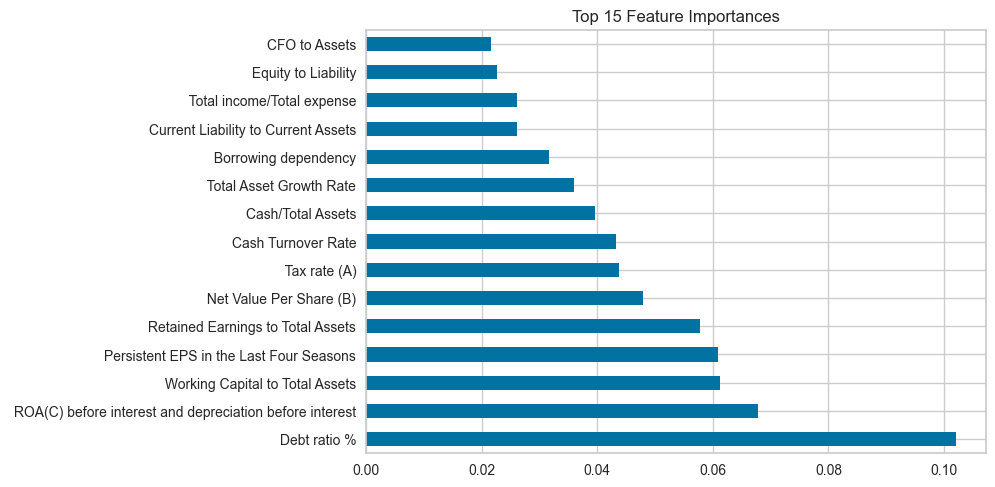

In [403]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(extra_trees.feature_importances_, index=X_train_scaled_res.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()

In [404]:
top15=feat_importances.index.values[0:15]

In [405]:
top15

array([' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Profit Rate',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'], dtype=object)

In [406]:
# Initialize the ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(
    n_estimators=100,           # more trees can improve stability
    max_depth=8,               # limit tree depth
    min_samples_split=6,        # require more samples to split a node
    min_samples_leaf=7,         # require more samples per leaf
    max_features='sqrt',        # control randomness in features
    bootstrap=True,             # use bootstrap samples for more variance
    random_state=42,
    n_jobs=-1
)

# Fit the model on the training data
extra_trees.fit(X_train_scaled_res[top15], y_train_res)

# Predict
y_pred_train = extra_trees.predict(X_train_scaled_res[top15])
y_pred_test = extra_trees.predict(X_test_scaled[top15])

# Accuracy
print("test Accuracy:", extra_trees.score(X_test_scaled[top15], y_test))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_test))

# Precision, Recall, F1, Accuracy
print('train')
print(classification_report(y_train_res, y_pred_train, digits=3))
print('test')
print(classification_report(y_pred_test, y_test, digits=3))


test Accuracy: 0.7741935483870968
[[1009  304]
 [   4   47]]
train
              precision    recall  f1-score   support

           0      0.866     0.782     0.822      5286
           1      0.801     0.879     0.838      5286

    accuracy                          0.830     10572
   macro avg      0.834     0.830     0.830     10572
weighted avg      0.834     0.830     0.830     10572

test
              precision    recall  f1-score   support

           0      0.768     0.996     0.868      1013
           1      0.922     0.134     0.234       351

    accuracy                          0.774      1364
   macro avg      0.845     0.565     0.551      1364
weighted avg      0.808     0.774     0.704      1364



In [455]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Ridge
import numpy as np

# Define your base models
base_models = [
    ('extra_trees', ExtraTreesClassifier(
        n_estimators=100,           # more trees can improve stability
        max_depth=8,               # limit tree depth
        min_samples_split=6,        # require more samples to split a node
        min_samples_leaf=7,         # require more samples per leaf
        max_features='sqrt',        # control randomness in features
        bootstrap=True,             # use bootstrap samples for more variance
        random_state=42,
        n_jobs=-1
    )),
    ('xgb', XGBClassifier(max_depth= 6,  # Very shallow trees
        min_samples_split=30,  # High minimum split
        min_samples_leaf=30,  # High minimum leaf samples
        n_estimators=6  # Fewer trees
        #random_state=42,

    )),
    ('random_forest', RandomForestClassifier(
        max_depth=3,  # Limit tree depth first
        min_samples_split=10,  # Require more samples to split
        min_samples_leaf=5,  # Require more samples per leaf
        n_estimators=40,  # Fewer trees
        max_features=None,  # Try using all features
        max_leaf_nodes=20,  # Limit number of leaf nodes
        min_impurity_decrease=0.008,  # Add impurity threshold
        bootstrap=True
        #random_state=42,

    ))
 ]

# Define the meta-learner (final estimator)
meta_learner = LogisticRegression(
    penalty='l2',
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,  # 5-fold cross-validation for stacking
    n_jobs=-1,  # Use all available cores
    passthrough=False  # Use only predictions from base models as features for meta-learner
)

# Alternative: You can also use a voting classifier as meta-learner
from sklearn.ensemble import VotingClassifier

# Or use another ensemble as meta-learner
from sklearn.ensemble import RandomForestClassifier as RFMeta

# Alternative stacking model with different meta-learner
stacking_model_rf_meta = StackingClassifier(
    estimators=base_models,
    final_estimator=RFMeta(n_estimators=50, random_state=42, n_jobs=-1),
    cv=5,
    n_jobs=-1
)

In [458]:
# Example usage with your data
# Assuming you have X_train, X_test, y_train, y_test

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model performance"""
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    print(f"{model_name} AccuracyTest: {accuracy_test:.4f}, AccuracyTrain: {accuracy_train:.4f}")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, y_pred

# Evaluate individual models
individual_results = {}
for name, model in base_models:
    accuracy, _ = evaluate_model(model, X_train_scaled_res, X_test_scaled, y_train_res, y_test, f"Individual {name}")
    individual_results[name] = accuracy

# Evaluate stacking model
stacking_accuracy, stacking_pred = evaluate_model(
    stacking_model, X_train_scaled_res, X_test_scaled, y_train_res, y_test, "Stacking Model"
)

Individual extra_trees AccuracyTest: 0.8842, AccuracyTrain: 0.9189
Individual extra_trees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.50      0.57      0.53        51

    accuracy                           0.96      1364
   macro avg       0.74      0.77      0.76      1364
weighted avg       0.97      0.96      0.96      1364

Individual xgb AccuracyTest: 0.9267, AccuracyTrain: 0.9717
Individual xgb Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.50      0.57      0.53        51

    accuracy                           0.96      1364
   macro avg       0.74      0.77      0.76      1364
weighted avg       0.97      0.96      0.96      1364

Individual random_forest AccuracyTest: 0.8600, AccuracyTrain: 0.9023
Individual random_forest Classification Report:
              preci

/Users/pasindumadusanka/.pyenv/versions/python_3_10_13-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [10:57:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[10:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:58:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_

Stacking Model AccuracyTest: 0.9355, AccuracyTrain: 0.9771
Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.50      0.57      0.53        51

    accuracy                           0.96      1364
   macro avg       0.74      0.77      0.76      1364
weighted avg       0.97      0.96      0.96      1364



In [410]:
# Compare results
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
for name, accuracy in individual_results.items():
    print(f"{name:20}: {accuracy:.4f}")
print(f"{'Stacking Model':20}: {stacking_accuracy:.4f}")


MODEL COMPARISON
extra_trees         : 0.9553
xgb                 : 0.9553
random_forest       : 0.9553
Stacking Model      : 0.9553


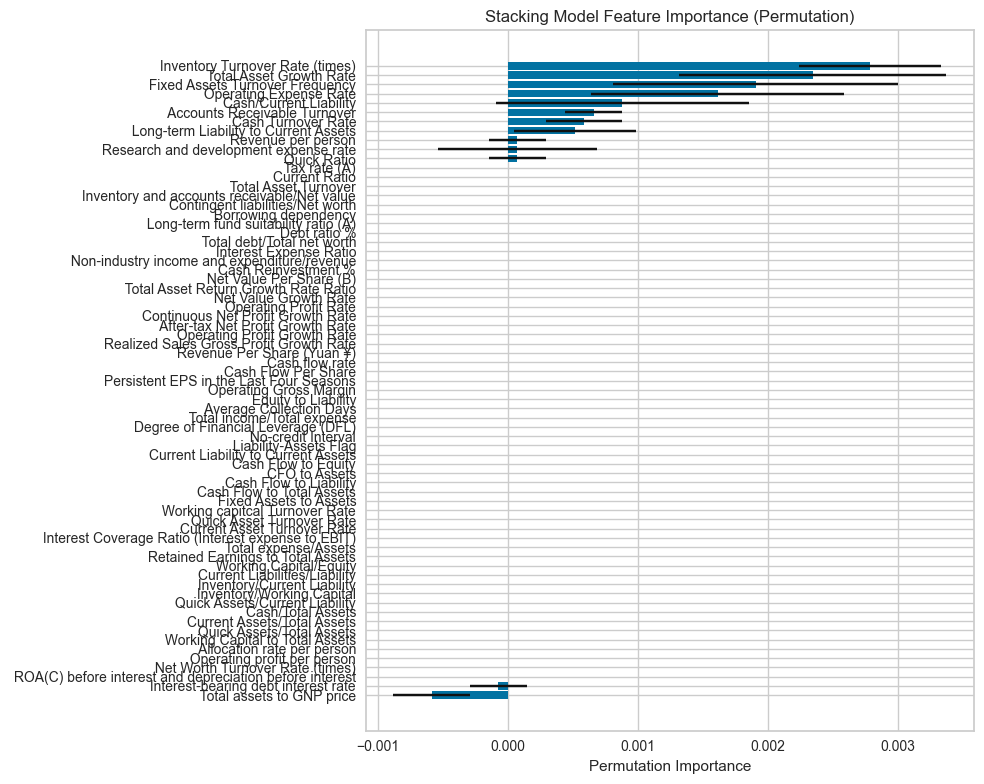

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

def plot_stacking_feature_importance(stacking_model, feature_names, X_test, y_test):
    """
    Plot feature importance for stacking model using permutation importance
    """
    # Calculate permutation importance
    perm_importance = permutation_importance(
        stacking_model, X_test, y_test, 
        n_repeats=10, 
        random_state=42,
        n_jobs=-1
    )
    
    # Create sorted feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    }).sort_values('importance', ascending=True)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['feature'], importance_df['importance'], 
             xerr=importance_df['std'], capsize=3)
    plt.xlabel('Permutation Importance')
    plt.title('Stacking Model Feature Importance (Permutation)')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Usage (assuming you have feature names)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]  # or actual names
feature_names = X_test.columns.values
base_model_names = [name for name, _ in stacking_model.estimators]

importance_df = plot_stacking_feature_importance(stacking_model, feature_names, X_test, y_test)

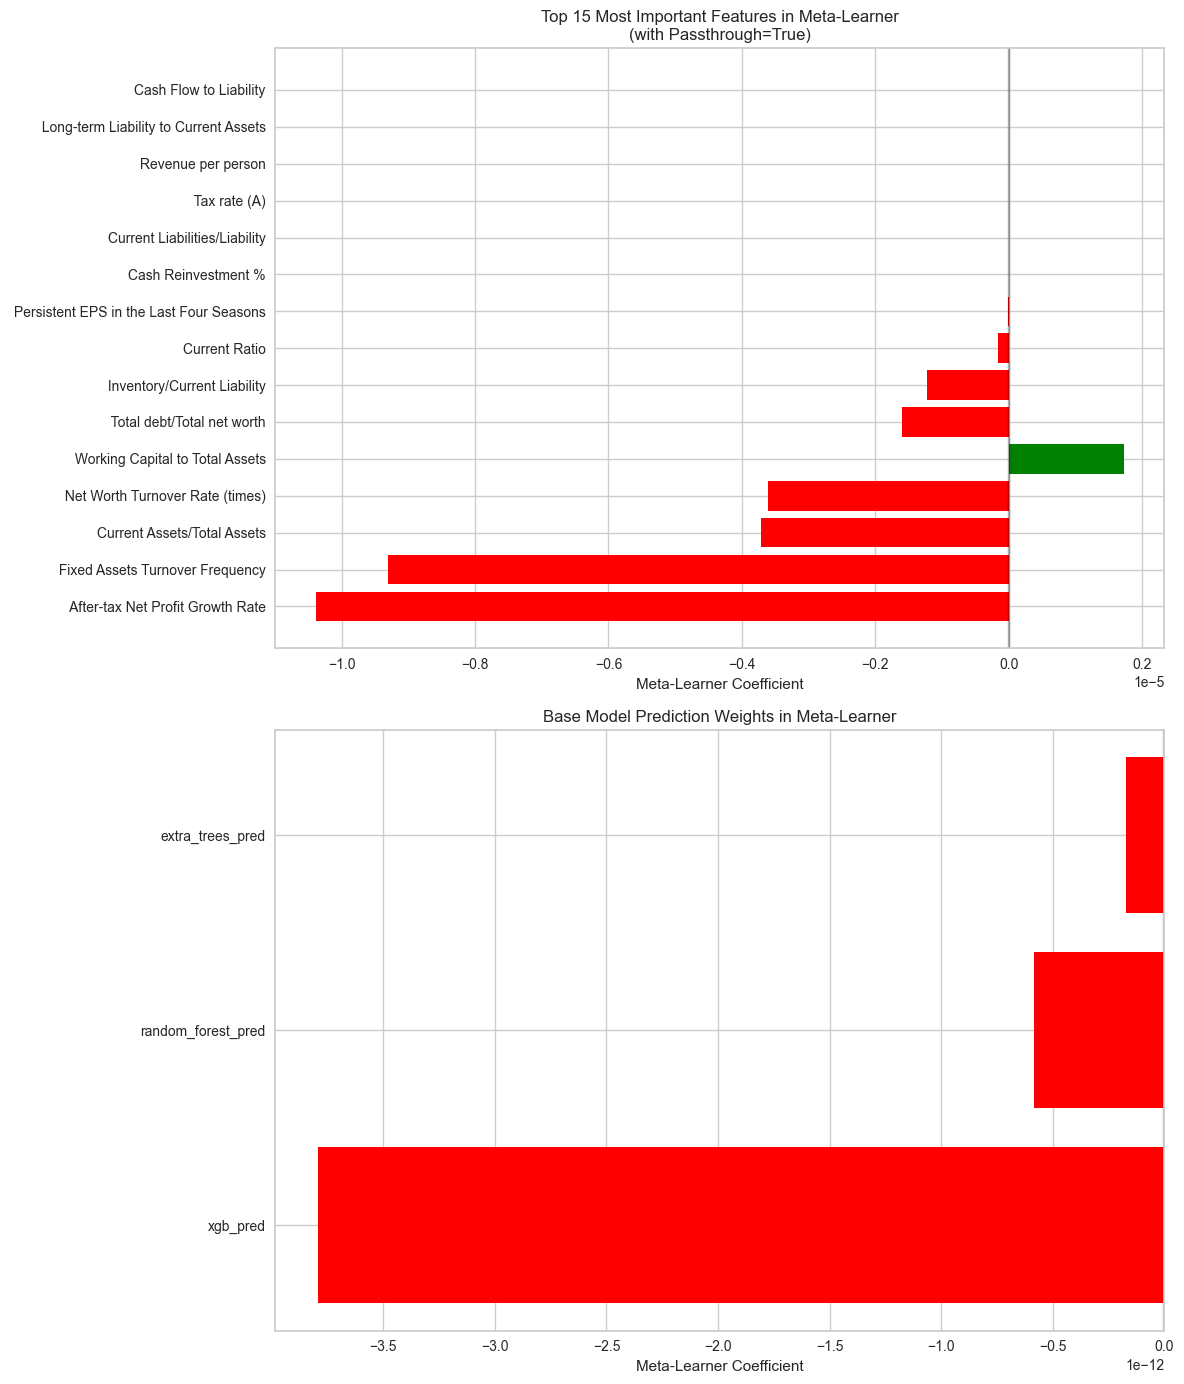

META-LEARNER COEFFICIENTS ANALYSIS (Passthrough=True)
Total features in meta-learner: 72
Original features: 69
Base model predictions: 3

Original Features in Top 10:
   After-tax Net Profit Growth Rate: -0.0000
   Fixed Assets Turnover Frequency: -0.0000
   Current Assets/Total Assets: -0.0000
   Net Worth Turnover Rate (times): -0.0000
   Working Capital to Total Assets: 0.0000
   Total debt/Total net worth: -0.0000
   Inventory/Current Liability: -0.0000
   Current Ratio           : -0.0000
   Persistent EPS in the Last Four Seasons: -0.0000
   Cash Reinvestment %     : -0.0000

Base Model Prediction Weights:
  xgb_pred                 :  -0.0000 (↓ Weak/negative)
  random_forest_pred       :  -0.0000 (↓ Weak/negative)
  extra_trees_pred         :  -0.0000 (↓ Weak/negative)


In [414]:
def analyze_passthrough_meta_learner(stacking_model, feature_names, base_model_names):
    """
    Analyze meta-learner coefficients when using passthrough
    """
    if not hasattr(stacking_model.final_estimator_, 'coef_'):
        print("Meta-learner doesn't have coefficients (might be tree-based)")
        return None
    
    coef = stacking_model.final_estimator_.coef_[0]
    
    # Create feature names for meta-learner input
    # With passthrough=True, the input to meta-learner is: [original_features, base_model_predictions]
    meta_feature_names = list(feature_names) + [f"{name}_pred" for name in base_model_names]
    
    # Create importance dataframe
    coef_df = pd.DataFrame({
        'feature': meta_feature_names,
        'coefficient': coef,
        'abs_importance': np.abs(coef)
    }).sort_values('abs_importance', ascending=False)
    
    # Separate types
    original_coef = coef_df[coef_df['feature'].isin(feature_names)]
    prediction_coef = coef_df[~coef_df['feature'].isin(feature_names)]
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
    
    # Top 15 overall
    top_features = coef_df.head(15)
    colors = ['green' if x > 0 else 'red' for x in top_features['coefficient']]
    ax1.barh(top_features['feature'], top_features['coefficient'], color=colors)
    ax1.set_xlabel('Meta-Learner Coefficient')
    ax1.set_title('Top 15 Most Important Features in Meta-Learner\n(with Passthrough=True)')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Base model predictions only
    colors_pred = ['green' if x > 0 else 'red' for x in prediction_coef['coefficient']]
    ax2.barh(prediction_coef['feature'], prediction_coef['coefficient'], color=colors_pred)
    ax2.set_xlabel('Meta-Learner Coefficient')
    ax2.set_title('Base Model Prediction Weights in Meta-Learner')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("META-LEARNER COEFFICIENTS ANALYSIS (Passthrough=True)")
    print("=" * 55)
    print(f"Total features in meta-learner: {len(coef_df)}")
    print(f"Original features: {len(original_coef)}")
    print(f"Base model predictions: {len(prediction_coef)}")
    
    print("\nOriginal Features in Top 10:")
    top_original = coef_df[coef_df['feature'].isin(feature_names)].head(10)
    for _, row in top_original.iterrows():
        print(f"  {row['feature']:25}: {row['coefficient']:.4f}")
    
    print("\nBase Model Prediction Weights:")
    for _, row in prediction_coef.iterrows():
        importance = "↑ Strong positive" if row['coefficient'] > 0.1 else "↓ Weak/negative"
        print(f"  {row['feature']:25}: {row['coefficient']:8.4f} ({importance})")
    
    return coef_df

# Analyze meta-learner with passthrough
coef_df = analyze_passthrough_meta_learner(stacking_model, feature_names, base_model_names)

In [415]:
def analyze_meta_learner_weights(stacking_model):
    """
    Analyze the weights assigned by the meta-learner
    """
    meta_learner = stacking_model.final_estimator_
    
    if hasattr(meta_learner, 'coef_'):
        coefficients = meta_learner.coef_[0]
        
        # Get base model names
        base_model_names = [name for name, _ in stacking_model.estimators]
        n_original_features = len(stacking_model.estimators_[0][1].feature_importances_) if hasattr(stacking_model.estimators_[0][1], 'feature_importances_') else coefficients.shape[0] - len(base_model_names)
        
        # Split coefficients
        original_feature_coef = coefficients[:n_original_features]
        base_model_coef = coefficients[n_original_features:]
        
        # Create dataframes
        original_df = pd.DataFrame({
            'feature': [f'feature_{i}' for i in range(len(original_feature_coef))],
            'coefficient': original_feature_coef,
            'abs_coef': np.abs(original_feature_coef)
        }).sort_values('abs_coef', ascending=False)
        
        base_model_df = pd.DataFrame({
            'model': base_model_names,
            'coefficient': base_model_coef,
            'abs_coef': np.abs(base_model_coef)
        }).sort_values('abs_coef', ascending=False)
        
        print("META-LEARNER COEFFICIENT ANALYSIS")
        print("=" * 40)
        print("\nTop 10 Original Features by Coefficient Magnitude:")
        print(original_df.head(10)[['feature', 'coefficient']])
        
        print("\nBase Model Coefficients:")
        print(base_model_df[['model', 'coefficient']])
        
        return original_df, base_model_df
    else:
        print("Meta-learner doesn't have coefficients (might be tree-based)")
        return None, None

# Analyze meta-learner weights
original_coef, base_model_coef = analyze_meta_learner_weights(stacking_model)

META-LEARNER COEFFICIENT ANALYSIS

Top 10 Original Features by Coefficient Magnitude:
       feature   coefficient
15  feature_15 -1.038557e-05
34  feature_34 -9.305696e-06
41  feature_41 -3.711828e-06
35  feature_35 -3.612168e-06
39  feature_39  1.726895e-06
24  feature_24 -1.593411e-06
46  feature_46 -1.231221e-06
21  feature_21 -1.536423e-07
10  feature_10 -4.470816e-09
20  feature_20 -3.450130e-10

Base Model Coefficients:
           model   coefficient
1            xgb -3.793510e-12
2  random_forest -5.838841e-13
0    extra_trees -1.713357e-13



=== Training extra_trees ===


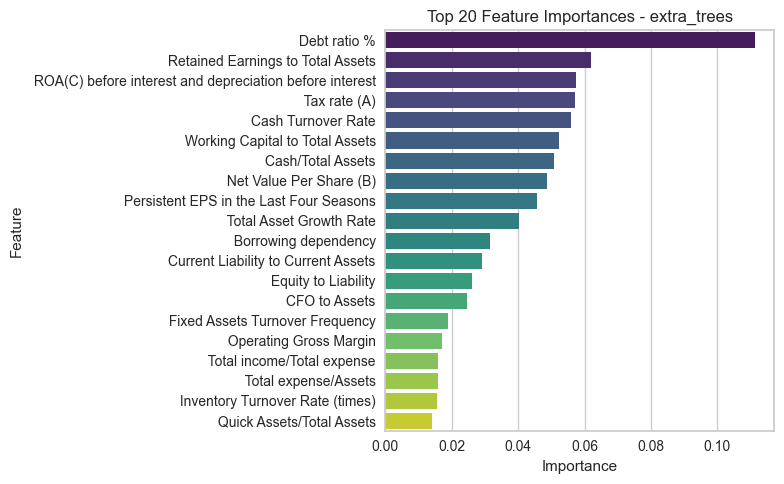


=== Training xgb ===


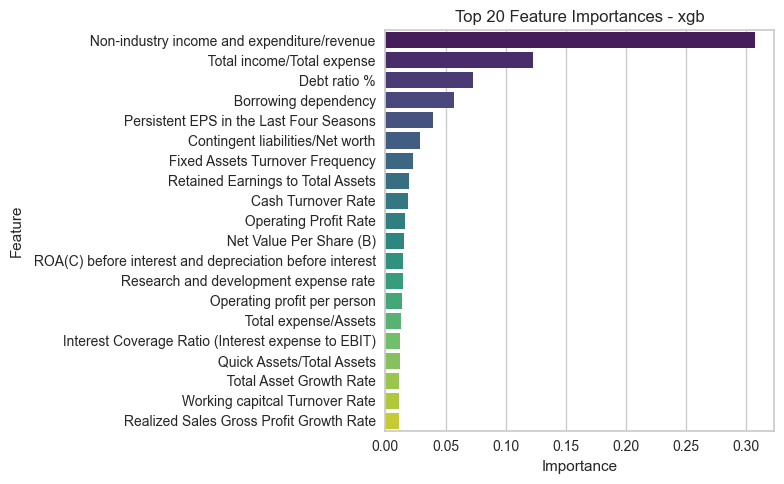


=== Training random_forest ===


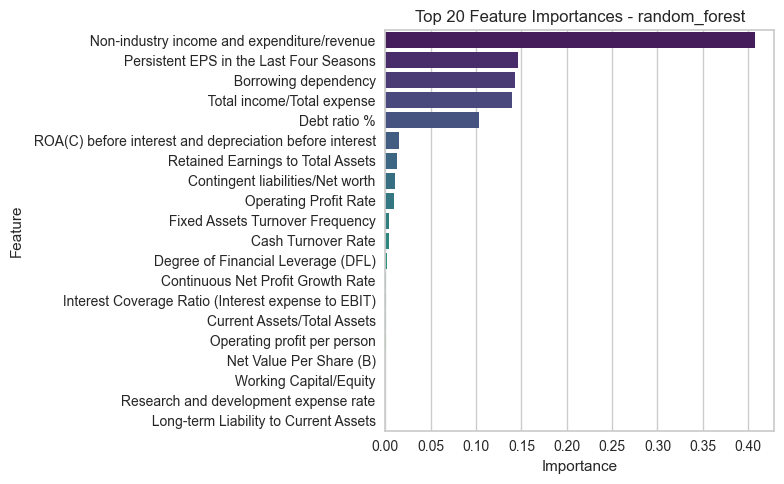

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importances(model, feature_names, model_name, top_n=20):
    """Plot top_n feature importances for tree-based models."""
    # Check if the model has feature_importances_
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  # for linear models like LogisticRegression
        importances = np.abs(model.coef_[0])
    else:
        print(f"{model_name} does not support feature importances.")
        return
    
    # Create DataFrame for visualization
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title(f'Top {top_n} Feature Importances - {model_name}')
    plt.tight_layout()
    plt.show()

# After training each base model
for name, model in base_models:
    print(f"\n=== Training {name} ===")
    model.fit(X_train_scaled_res, y_train_res)
    plot_feature_importances(model, X_train_scaled_res.columns, name)
